# LIVER TISSUE SAMPLE FROM DONOR 3

In [1]:
import pandas as pd
import numpy as np
import math
import re

## Load the file generated by salmon quant (converted to .xlsx)

In [2]:
donor = pd.read_excel("Donor3TPM.xlsx") 
donor

,Name,Length,EffectiveLength,TPM,NumReads
0,ENST00000456328.2|ENSG00000223972.5|OTTHUMG000...,1657,1407.000,0.000000,0.000
1,ENST00000450305.2|ENSG00000223972.5|OTTHUMG000...,632,382.000,0.000000,0.000
2,ENST00000488147.1|ENSG00000227232.5|OTTHUMG000...,1351,1101.000,0.000000,0.000
3,ENST00000619216.1|ENSG00000278267.1|-|-|MIR685...,68,2.848,0.000000,0.000
4,ENST00000473358.1|ENSG00000243485.5|OTTHUMG000...,712,462.000,0.000000,0.000
...,...,...,...,...,...
227457,ENST00000361681.2|ENSG00000198695.2|-|-|MT-ND6...,525,275.000,1873.355473,471.595
227458,ENST00000387459.1|ENSG00000210194.1|-|-|MT-TE-...,69,2.865,389.909285,1.023
227459,ENST00000361789.2|ENSG00000198727.2|-|-|MT-CYB...,1141,891.000,7253.059927,5915.820
227460,ENST00000387460.2|ENSG00000210195.2|-|-|MT-TT-...,66,2.815,1940.478577,5.000


Modify the 'Name' column and remove the exessive columns

In [3]:
donor[['ENST','ENSG', 'OTTHUMG', 'OTTHUMT', 'GeneTranscriptID', 'GeneID', 'Length_1','Type', 'ToRemove']] = donor.Name.str.split("|",expand = True,)
donor = donor.drop(['Name','ENST','ENSG','OTTHUMG','OTTHUMT','Length_1','ToRemove'],axis = 1)
donor

,Length,EffectiveLength,TPM,NumReads,GeneTranscriptID,GeneID,Type
0,1657,1407.000,0.000000,0.000,DDX11L1-202,DDX11L1,lncRNA
1,632,382.000,0.000000,0.000,DDX11L1-201,DDX11L1,transcribed_unprocessed_pseudogene
2,1351,1101.000,0.000000,0.000,WASH7P-201,WASH7P,unprocessed_pseudogene
3,68,2.848,0.000000,0.000,MIR6859-1-201,MIR6859-1,miRNA
4,712,462.000,0.000000,0.000,MIR1302-2HG-202,MIR1302-2HG,lncRNA
...,...,...,...,...,...,...,...
227457,525,275.000,1873.355473,471.595,MT-ND6-201,MT-ND6,protein_coding
227458,69,2.865,389.909285,1.023,MT-TE-201,MT-TE,Mt_tRNA
227459,1141,891.000,7253.059927,5915.820,MT-CYB-201,MT-CYB,protein_coding
227460,66,2.815,1940.478577,5.000,MT-TT-201,MT-TT,Mt_tRNA


Fix the order of columns

In [4]:
donor = donor[['GeneTranscriptID','GeneID','Length','Type','EffectiveLength','TPM', 'NumReads']]
donor

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
0,DDX11L1-202,DDX11L1,1657,lncRNA,1407.000,0.000000,0.000
1,DDX11L1-201,DDX11L1,632,transcribed_unprocessed_pseudogene,382.000,0.000000,0.000
2,WASH7P-201,WASH7P,1351,unprocessed_pseudogene,1101.000,0.000000,0.000
3,MIR6859-1-201,MIR6859-1,68,miRNA,2.848,0.000000,0.000
4,MIR1302-2HG-202,MIR1302-2HG,712,lncRNA,462.000,0.000000,0.000
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,1873.355473,471.595
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,389.909285,1.023
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,7253.059927,5915.820
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,1940.478577,5.000


### Drop the zero transscripts

In [5]:
donor.loc[donor['TPM'] != 0] # Non-zero transcripts

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
47,AL732372.2-202,AL732372.2,498,lncRNA,248.000,4.404862,1.000
93,MTND1P23-201,MTND1P23,372,unprocessed_pseudogene,122.000,2512.119595,280.554
94,MTND2P28-201,MTND2P28,1044,unprocessed_pseudogene,794.000,2116.104641,1538.061
95,MTCO1P12-201,MTCO1P12,1543,unprocessed_pseudogene,1293.000,4437.723952,5252.606
97,MTCO2P12-201,MTCO2P12,682,unprocessed_pseudogene,432.000,6855.072569,2710.890
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,1873.355473,471.595
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,389.909285,1.023
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,7253.059927,5915.820
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,1940.478577,5.000


In [6]:
donor.loc[donor['TPM'] == 0]# Zero transcripts

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
0,DDX11L1-202,DDX11L1,1657,lncRNA,1407.000,0.0,0.0
1,DDX11L1-201,DDX11L1,632,transcribed_unprocessed_pseudogene,382.000,0.0,0.0
2,WASH7P-201,WASH7P,1351,unprocessed_pseudogene,1101.000,0.0,0.0
3,MIR6859-1-201,MIR6859-1,68,miRNA,2.848,0.0,0.0
4,MIR1302-2HG-202,MIR1302-2HG,712,lncRNA,462.000,0.0,0.0
...,...,...,...,...,...,...,...
227448,MT-TG-201,MT-TG,68,Mt_tRNA,2.848,0.0,0.0
227450,MT-TR-201,MT-TR,65,Mt_tRNA,2.798,0.0,0.0
227453,MT-TH-201,MT-TH,69,Mt_tRNA,2.865,0.0,0.0
227454,MT-TS2-201,MT-TS2,59,Mt_tRNA,2.702,0.0,0.0


In [7]:
donor.describe() # Общая информация

,Length,EffectiveLength,TPM,NumReads
count,227462.000000,227462.000000,227462.000000,227462.000000
mean,1572.205001,1328.013905,4.396339,2.275897
std,1880.949598,1876.647383,229.300678,84.811216
min,8.000000,1.722000,0.000000,0.000000
25%,564.000000,314.000000,0.000000,0.000000
50%,881.000000,631.000000,0.000000,0.000000
75%,1990.000000,1740.000000,0.000000,0.000000
max,205012.000000,204762.000000,55311.456978,17359.606000


In [8]:
donor.loc[donor['TPM'] != 0].describe() # Только для ненулевых транскриптов

,Length,EffectiveLength,TPM,NumReads
count,21882.000000,21882.000000,21882.000000,21882.000000
mean,2746.112787,2496.472450,45.699662,23.657801
std,2830.801379,2830.477497,738.029972,272.520451
min,61.000000,2.734000,0.012156,0.500000
25%,1085.000000,835.000000,0.787319,1.156250
50%,2048.500000,1798.500000,2.225346,3.000000
75%,3583.000000,3333.000000,7.028344,8.008750
max,205012.000000,204762.000000,55311.456978,17359.606000


### Save the non-zero transcripts for futher work

In [9]:
donor = donor[donor.TPM != 0]
donor

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
47,AL732372.2-202,AL732372.2,498,lncRNA,248.000,4.404862,1.000
93,MTND1P23-201,MTND1P23,372,unprocessed_pseudogene,122.000,2512.119595,280.554
94,MTND2P28-201,MTND2P28,1044,unprocessed_pseudogene,794.000,2116.104641,1538.061
95,MTCO1P12-201,MTCO1P12,1543,unprocessed_pseudogene,1293.000,4437.723952,5252.606
97,MTCO2P12-201,MTCO2P12,682,unprocessed_pseudogene,432.000,6855.072569,2710.890
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,1873.355473,471.595
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,389.909285,1.023
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,7253.059927,5915.820
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,1940.478577,5.000


### Sort the transcripts by TPM to get the top-expressed transcripts

In [10]:
donor.sort_values(by = ['TPM'],  ascending = False) 

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
227449,MT-ND3-201,MT-ND3,346,protein_coding,96.006,55311.456978,4861.033
128301,APOC3-205,APOC3,541,protein_coding,291.000,43755.143727,11655.694
98,MTATP8P1-201,MTATP8P1,207,unprocessed_pseudogene,9.766,38469.717397,343.915
227447,MT-CO3-201,MT-CO3,784,protein_coding,534.000,29984.946553,14657.522
202058,APOC1-201,APOC1,425,protein_coding,175.000,29940.040238,4796.301
...,...,...,...,...,...,...,...
4799,MACF1-232,MACF1,24319,protein_coding,24069.000,0.047724,1.052
216674,AC003681.1-201,AC003681.1,49287,lncRNA,49037.000,0.044554,2.000
145308,PCDH9-201,PCDH9,28227,protein_coding,27977.000,0.039047,1.000
215557,AC245452.1-201,AC245452.1,37852,lncRNA,37602.000,0.029052,1.000


### Sort the transcripts by number of reads mapped

In [11]:
donor.sort_values(by = ['NumReads'],  ascending = False) 

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
227428,MT-RNR2-201,MT-RNR2,1559,Mt_rRNA,1309.0,14487.191389,17359.606
227447,MT-CO3-201,MT-CO3,784,protein_coding,534.0,29984.946553,14657.522
54333,ALB-209,ALB,1741,protein_coding,1491.0,9654.263311,13176.886
128301,APOC3-205,APOC3,541,protein_coding,291.0,43755.143727,11655.694
99,MTATP6P1-201,MTATP6P1,681,unprocessed_pseudogene,431.0,22566.313170,8903.359
...,...,...,...,...,...,...,...
103000,UNC13B-208,UNC13B,5063,nonsense_mediated_decay,4813.0,0.113485,0.500
103001,UNC13B-202,UNC13B,5063,protein_coding,4813.0,0.113485,0.500
155167,TEDC1-202,TEDC1,1358,protein_coding,1108.0,0.492963,0.500
155166,TEDC1-218,TEDC1,1358,nonsense_mediated_decay,1108.0,0.492963,0.500


### Thequantitative profile of transcripts biotypes

In [12]:
donor['Type'].unique()

array(['lncRNA', 'unprocessed_pseudogene', 'retained_intron',
       'protein_coding', 'nonsense_mediated_decay',
       'processed_pseudogene', 'polymorphic_pseudogene', 'TEC', 'snRNA',
       'scRNA', 'snoRNA', 'IG_V_gene', 'IG_C_gene', 'misc_RNA',
       'transcribed_processed_pseudogene',
       'transcribed_unprocessed_pseudogene', 'TR_C_gene',
       'non_stop_decay', 'pseudogene', 'IG_V_pseudogene',
       'transcribed_unitary_pseudogene', 'miRNA', 'rRNA', 'Mt_tRNA',
       'Mt_rRNA'], dtype=object)

In [13]:
for i in donor['Type'].unique():
    print(i,':', len(donor[donor['Type'].str.contains(i)]))

lncRNA : 2934
unprocessed_pseudogene : 58
retained_intron : 2051
protein_coding : 14858
nonsense_mediated_decay : 1663
processed_pseudogene : 221
polymorphic_pseudogene : 6
TEC : 52
snRNA : 2
scRNA : 1
snoRNA : 4
IG_V_gene : 23
IG_C_gene : 18
misc_RNA : 6
transcribed_processed_pseudogene : 10
transcribed_unprocessed_pseudogene : 22
TR_C_gene : 5
non_stop_decay : 12
pseudogene : 232
IG_V_pseudogene : 2
transcribed_unitary_pseudogene : 2
miRNA : 5
rRNA : 4
Mt_tRNA : 12
Mt_rRNA : 2


In [14]:
# RNA
len(donor[donor['Type'].str.contains(r'RNA')])

2968

In [15]:
len(donor[donor['Type'].str.contains(r'pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'transcribed_unprocessed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'transcribed_processed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'processed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'unprocessed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'polymorphic_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'transcribed_unitary_pseudogene')])


551

In [16]:
IGTR = len(donor[donor['Type'].str.contains(r'IG_V_gene')]) + \
len(donor[donor['Type'].str.contains(r'IG_C_gene')]) + \
len(donor[donor['Type'].str.contains(r'IG_V_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'TR_C_gene')]) + \
len(donor[donor['Type'].str.contains(r'TR_V_gene')])
IGTR

48

In [17]:
# Visualization

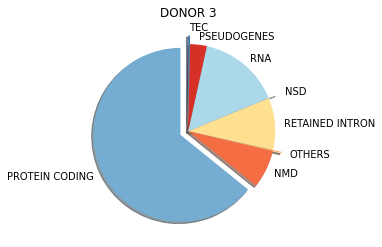

In [18]:
import matplotlib.pyplot as plt

labels = ['PROTEIN CODING', 
          'NMD',
          'OTHERS',
          'RETAINED INTRON',
          'NSD',
          'RNA', 
          'PSEUDOGENES', 
          'TEC']

sizes = [19675, 2181, 68, 2960, 13, 4703, 954, 97]

# colors = ["paleturquoise", "limegreen", "blue", "purple", "orange", "pink", "yellow", "red"]
colors =['#74add1', '#f46d43', '#fdae61', '#fee090', '#e0f3f8', '#abd9e9','#d73027' , '#4575b4']

explode = (0.1, 0, 0.1, 0, 0.1, 0, 0, 0.1)



fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, colors = colors,
        shadow = True, startangle = 90)

ax1.set_title("DONOR 3")

#plt.savefig('Donor1_Sum.png')


plt.show()

### Retrieve protein_coding transcripts 

In [19]:
donor_protein = donor[donor['Type'].str.contains(r'protein_coding')]
donor_protein
# protein_coding = 14858

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
194,SAMD11-216,SAMD11,1874,protein_coding,1624.000,0.672664,1.000
226,ISG15-202,ISG15,787,protein_coding,537.000,54.276933,26.681
228,ISG15-203,ISG15,637,protein_coding,387.000,26.304637,9.319
234,AGRN-209,AGRN,7477,protein_coding,7227.000,0.151156,1.000
250,C1orf159-204,C1orf159,2429,protein_coding,2179.000,0.501334,1.000
...,...,...,...,...,...,...,...
227451,MT-ND4L-201,MT-ND4L,297,protein_coding,48.689,4079.726653,181.836
227452,MT-ND4-201,MT-ND4,1378,protein_coding,1128.000,6400.296599,6608.840
227456,MT-ND5-201,MT-ND5,1812,protein_coding,1562.000,677.245547,968.374
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,1873.355473,471.595


In [20]:
donor_protein[(donor_protein['GeneID'] == 'A1CF')] # суммирование работает

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
111935,A1CF-205,A1CF,9221,protein_coding,8971.0,0.329647,2.707
111937,A1CF-201,A1CF,9350,protein_coding,9100.0,2.533943,21.108
111938,A1CF-207,A1CF,9400,protein_coding,9150.0,8.651809,72.468
111939,A1CF-202,A1CF,1997,protein_coding,1747.0,11.813091,18.892
111940,A1CF-203,A1CF,2211,protein_coding,1961.0,4.922384,8.836


## Count the number of transcript isoforms (splice variant) in a single gene and a number of protein coding genes

In [21]:
spl_var_num = donor_protein.groupby('GeneID', as_index = False).count() 
spl_var_num

,GeneID,GeneTranscriptID,Length,Type,EffectiveLength,TPM,NumReads
0,A1BG,1,1,1,1,1,1
1,A1CF,5,5,5,5,5,5
2,A2M,1,1,1,1,1,1
3,A4GALT,1,1,1,1,1,1
4,AAAS,1,1,1,1,1,1
...,...,...,...,...,...,...,...
9678,ZXDB,1,1,1,1,1,1
9679,ZXDC,1,1,1,1,1,1
9680,ZYG11B,1,1,1,1,1,1
9681,ZYX,1,1,1,1,1,1


## Summing the total TPM for each gene

In [22]:
total_tpm = donor_protein.groupby('GeneID', as_index = False).sum()
total_tpm

,GeneID,Length,EffectiveLength,TPM,NumReads
0,A1BG,3382,3132.0,32.512237,93.215
1,A1CF,32179,30929.0,28.250874,124.011
2,A2M,4844,4594.0,29.942616,125.921
3,A4GALT,1956,1706.0,1.280663,2.000
4,AAAS,1652,1402.0,1.290188,1.656
...,...,...,...,...,...
9678,ZXDB,5894,5644.0,0.193552,1.000
9679,ZXDC,3377,3127.0,1.048039,3.000
9680,ZYG11B,8143,7893.0,1.384018,10.000
9681,ZYX,2123,1873.0,4.082670,7.000


In [23]:
total_tpm.insert(4, "NumSplVar", spl_var_num['Length'], True)

In [24]:
total_tpm

,GeneID,Length,EffectiveLength,TPM,NumSplVar,NumReads
0,A1BG,3382,3132.0,32.512237,1,93.215
1,A1CF,32179,30929.0,28.250874,5,124.011
2,A2M,4844,4594.0,29.942616,1,125.921
3,A4GALT,1956,1706.0,1.280663,1,2.000
4,AAAS,1652,1402.0,1.290188,1,1.656
...,...,...,...,...,...,...
9678,ZXDB,5894,5644.0,0.193552,1,1.000
9679,ZXDC,3377,3127.0,1.048039,1,3.000
9680,ZYG11B,8143,7893.0,1.384018,1,10.000
9681,ZYX,2123,1873.0,4.082670,1,7.000


## There is 9683 protein coding genes in liver tissue of donor 1 (19675 transcripts)

In [25]:
for i in total_tpm['NumSplVar'].unique():
    print('Number of genes having',i,'isoforms (splice variants) is :', len(total_tpm[(total_tpm['NumSplVar'] == i)]))

Number of genes having 1 isoforms (splice variants) is : 5927
Number of genes having 5 isoforms (splice variants) is : 52
Number of genes having 2 isoforms (splice variants) is : 2746
Number of genes having 3 isoforms (splice variants) is : 724
Number of genes having 4 isoforms (splice variants) is : 209
Number of genes having 6 isoforms (splice variants) is : 11
Number of genes having 8 isoforms (splice variants) is : 5
Number of genes having 7 isoforms (splice variants) is : 8
Number of genes having 9 isoforms (splice variants) is : 1


Text(0.5, 0.98, 'DONOR 3')

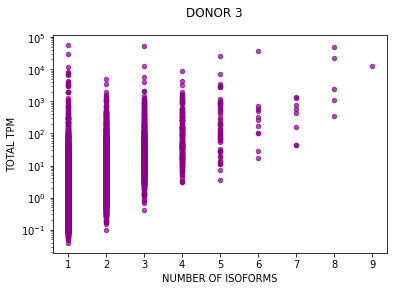

In [26]:
total_tpm.plot.scatter(x = "NumSplVar", y = "TPM", logy = True, alpha = 0.7, c = 'darkmagenta')
plt.xlabel("NUMBER OF ISOFORMS")
plt.ylabel("TOTAL TPM")
plt.suptitle('DONOR 3')
# plt.savefig('Donor3_SplVar.png')

# Cytochrome P450

In [27]:
donor_cyp = donor_protein[donor_protein['GeneID'].str.contains(r'CYP')]
donor_cyp

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
6220,CYP4A11-202,CYP4A11,1760,protein_coding,1510.0,3.954406,5.466
6221,CYP4A11-201,CYP4A11,2530,protein_coding,2280.0,69.800812,145.684
6226,CYP4A11-203,CYP4A11,1725,protein_coding,1475.0,2.654775,3.585
6240,CYP4A22-203,CYP4A22,2535,protein_coding,2285.0,37.324244,78.072
6242,CYP4A22-206,CYP4A22,2351,protein_coding,2101.0,0.519946,1.000
...,...,...,...,...,...,...,...
201152,CYP2A13-201,CYP2A13,1760,protein_coding,1510.0,4.127144,5.705
218542,CYP2D6-205,CYP2D6,1588,protein_coding,1338.0,15.374649,18.831
218545,CYP2D6-201,CYP2D6,1433,protein_coding,1183.0,13.193831,14.288
218552,CYP2D7-208,CYP2D7,1504,protein_coding,1254.0,4.853084,5.571


## Count the number of transcript isoforms (splice variant) in a single gene and a number of protein coding genes

In [28]:
cyp_spl = donor_cyp.groupby('GeneID', as_index=False).count() #Информация о каждой группе (сколько сплайс-вариантов у каждого гена цитохромов)
cyp_spl

,GeneID,GeneTranscriptID,Length,Type,EffectiveLength,TPM,NumReads
0,ACYP2,1,1,1,1,1,1
1,CYP17A1,1,1,1,1,1,1
2,CYP1A1,1,1,1,1,1,1
3,CYP1A2,1,1,1,1,1,1
4,CYP1B1,1,1,1,1,1,1
5,CYP20A1,1,1,1,1,1,1
6,CYP26A1,1,1,1,1,1,1
7,CYP27A1,1,1,1,1,1,1
8,CYP2A13,1,1,1,1,1,1
9,CYP2A6,1,1,1,1,1,1


In [29]:
total_tpm_cyp = donor_cyp.groupby('GeneID', as_index=False).sum() # summing TPM on all splice varinats of a single gene
total_tpm_cyp   

,GeneID,Length,EffectiveLength,TPM,NumReads
0,ACYP2,1262,1012.0,8.635619,8.000
1,CYP17A1,1722,1472.0,3.718151,5.010
2,CYP1A1,2603,2353.0,0.464261,1.000
3,CYP1A2,3132,2882.0,13.645596,36.000
4,CYP1B1,5218,4968.0,1.099442,5.000
5,CYP20A1,1986,1736.0,0.688493,1.094
6,CYP26A1,2245,1995.0,1.642715,3.000
7,CYP27A1,1895,1645.0,23.265510,35.034
8,CYP2A13,1760,1510.0,4.127144,5.705
9,CYP2A6,1761,1511.0,325.978885,450.889


In [30]:
total_tpm_cyp.insert(4, "NumSplVar", cyp_spl['Length'], True)

In [31]:
total_tpm_cyp

,GeneID,Length,EffectiveLength,TPM,NumSplVar,NumReads
0,ACYP2,1262,1012.0,8.635619,1,8.000
1,CYP17A1,1722,1472.0,3.718151,1,5.010
2,CYP1A1,2603,2353.0,0.464261,1,1.000
3,CYP1A2,3132,2882.0,13.645596,1,36.000
4,CYP1B1,5218,4968.0,1.099442,1,5.000
5,CYP20A1,1986,1736.0,0.688493,1,1.094
6,CYP26A1,2245,1995.0,1.642715,1,3.000
7,CYP27A1,1895,1645.0,23.265510,1,35.034
8,CYP2A13,1760,1510.0,4.127144,1,5.705
9,CYP2A6,1761,1511.0,325.978885,1,450.889


In [32]:
total_tpm_cyp = total_tpm_cyp.iloc[1:] # Drop non-CYP

In [33]:
len(total_tpm_cyp)

37

## There is 37 CYP gene in donor 3

Text(0.5, 0.98, 'DONOR 3')

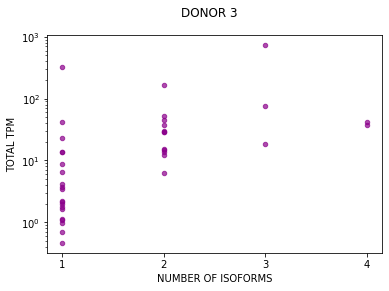

In [34]:
total_tpm_cyp.plot.scatter(x = "NumSplVar", y = "TPM", logy = True, alpha = 0.7, c = 'darkmagenta')
plt.xticks([1,2,3,4])
plt.xlabel("NUMBER OF ISOFORMS")
plt.ylabel("TOTAL TPM")
plt.suptitle('DONOR 3')
# plt.savefig('Donor3_SplVarСyp.png')

In [35]:
len(total_tpm_cyp[total_tpm_cyp.NumSplVar == 1])

20

In [36]:
total_tpm_cyp.describe()

,Length,EffectiveLength,TPM,NumSplVar,NumReads
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,4104.162162,3692.000000,49.146948,1.648649,80.920757
std,2163.859624,2011.569716,129.336658,0.856875,182.431287
min,1722.000000,1472.000000,0.464261,1.000000,1.000000
25%,2445.000000,2195.000000,2.190653,1.000000,5.010000
50%,3761.000000,3261.000000,13.722646,1.000000,28.000000
75%,4768.000000,4518.000000,37.106335,2.000000,70.507000
max,10374.000000,9624.000000,731.358000,4.000000,1028.346000


In [37]:
#total_tpm_cyp.to_excel("sum_cyp_donor.xlsx") 

# Pharmacogenes

In [38]:
pharmgenes = pd.read_excel("Pharmacogenes.xlsx") # The list of pharmacogenes from Chhibber et al., 2017
pharmgenes = pharmgenes.set_index('Gene')

In [39]:
pharmgenes

,Number,Ensembl Gene ID,Category,Drug Target,GPCR as Drug Target,Enzyme as as Drug Target,Ion Channel as Drug Target
Gene,,,,,,,
ABCA1,1,ENSG00000165029.11,ABC_Transporter,N,N,N,N
ABCA4,2,ENSG00000198691.6,ABC_Transporter,Y,N,N,N
ABCB1,3,ENSG00000085563.8,ABC_Transporter,Y,N,N,N
ABCB10,4,ENSG00000135776.4,ABC_Transporter,N,N,N,N
ABCB11,5,ENSG00000073734.8,ABC_Transporter,N,N,N,N
...,...,...,...,...,...,...,...
VDR,385,ENSG00000111424.6,Nuclear Receptor/Transcription Factor,Y,N,N,N
VKORC1,386,ENSG00000167397.10,Other,Y,N,N,N
XDH,387,ENSG00000158125.5,Other_Metabolism,Y,N,Y,N


## Set the GeneID as index column

In [40]:
prot_idx = total_tpm.set_index('GeneID')
prot_idx

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
A1BG,3382,3132.0,32.512237,1,93.215
A1CF,32179,30929.0,28.250874,5,124.011
A2M,4844,4594.0,29.942616,1,125.921
A4GALT,1956,1706.0,1.280663,1,2.000
AAAS,1652,1402.0,1.290188,1,1.656
...,...,...,...,...,...
ZXDB,5894,5644.0,0.193552,1,1.000
ZXDC,3377,3127.0,1.048039,1,3.000
ZYG11B,8143,7893.0,1.384018,1,10.000


## Search for pharmacogenes in the donor 3

In [41]:
pharmgenes_donor = prot_idx[prot_idx.index.isin(pharmgenes.index)]
pharmgenes_donor

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
ABCA1,10408,10158.0,0.860331,1,8.000
ABCB1,4524,4274.0,1.336384,1,5.229
ABCB10,3869,3619.0,3.924088,1,13.000
ABCB11,7345,6845.0,8.419488,2,11.000
ABCB4,8230,7730.0,7.206768,2,24.922
...,...,...,...,...,...
UGT2B4,3936,3436.0,166.211823,2,257.786
UGT2B7,5053,4303.0,310.732136,3,412.933
VKORC1,1953,1453.0,185.541721,2,110.996


## There is 237 pharmacogenes found in donor 1

In [42]:
#pharmgenes_donor.to_excel("Pharmacogenes_d1.xlsx") 

## Sort by TPM to get the top-expressed pharmacogenes

In [43]:
pharmgenes_donor.sort_values(by = ['TPM'], ascending = False).head(50)

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
APOA2,3239,1262.46,49605.068677,8,8924.870
APOA1,5114,3864.00,25975.453829,5,16543.283
ALB,13622,11622.00,21856.805989,8,29101.629
ORM1,802,552.00,7919.486752,1,4001.770
APOE,2767,2017.00,5761.913288,3,4624.627
ORM2,764,514.00,3423.403340,1,1610.784
CES1,6528,5528.00,1626.211854,4,1662.341
SERPINA1,18630,16630.00,1060.352067,8,1410.702
CYB5A,4725,3975.00,868.133915,3,427.240


In [44]:
phgt = pharmgenes[pharmgenes.index.isin(pharmgenes_donor.index)]
phgt

,Number,Ensembl Gene ID,Category,Drug Target,GPCR as Drug Target,Enzyme as as Drug Target,Ion Channel as Drug Target
Gene,,,,,,,
ABCA1,1,ENSG00000165029.11,ABC_Transporter,N,N,N,N
ABCB1,3,ENSG00000085563.8,ABC_Transporter,Y,N,N,N
ABCB10,4,ENSG00000135776.4,ABC_Transporter,N,N,N,N
ABCB11,5,ENSG00000073734.8,ABC_Transporter,N,N,N,N
ABCB4,6,ENSG00000005471.11,ABC_Transporter,N,N,N,N
...,...,...,...,...,...,...,...
UGT2B4,382,ENSG00000156096.8,UGT_Metabolism,N,N,N,N
UGT2B7,383,ENSG00000171234.9,UGT_Metabolism,N,N,N,N
VKORC1,386,ENSG00000167397.10,Other,Y,N,N,N


## Quantification

In [45]:
len(phgt['Category'].unique())

14

In [46]:
print('ABC_Transporter:', len(phgt[phgt['Category'].str.contains(r'ABC_Transporter')]))
print('Other:', len(phgt[phgt['Category'].str.contains(r'Other')]))
print('ADH_Metabolism:', len(phgt[phgt['Category'].str.contains(r'ADH_Metabolism')]))
print('Receptor:', len(phgt[phgt['Category'].str.contains(r'Receptor')]))
print('Nuclear Receptor/Transcription Factor:', len(phgt[phgt['Category'].str.contains(r'Nuclear Receptor/Transcription Factor')]))
print('ALDH_Metabolism:', len(phgt[phgt['Category'].str.contains(r'ALDH_Metabolism')]))
print('Other_Metabolism:', len(phgt[phgt['Category'].str.contains(r'Other_Metabolism')]))
print('Other_Transporter:', len(phgt[phgt['Category'].str.contains(r'Other_Transporter')]))
print('CYP_Metabolism:', len(phgt[phgt['Category'].str.contains(r'CYP_Metabolism')]))
print('GST_Metabolism:', len(phgt[phgt['Category'].str.contains(r'GST_Metabolism')]))
print('Channel:', len(phgt[phgt['Category'].str.contains(r'Channel')]))
print('SLC_Transporter:', len(phgt[phgt['Category'].str.contains(r'SLC_Transporter')]))
print('SULT_Metabolism:', len(phgt[phgt['Category'].str.contains(r'SULT_Metabolism')]))
print('UGT_Metabolism:', len(phgt[phgt['Category'].str.contains(r'UGT_Metabolism')]))

ABC_Transporter: 18
Other: 88
ADH_Metabolism: 6
Receptor: 27
Nuclear Receptor/Transcription Factor: 20
ALDH_Metabolism: 6
Other_Metabolism: 40
Other_Transporter: 3
CYP_Metabolism: 32
GST_Metabolism: 9
Channel: 1
SLC_Transporter: 28
SULT_Metabolism: 6
UGT_Metabolism: 16
